<a href="https://colab.research.google.com/github/karunyat/Oversampling-Techniques/blob/main/MC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NASA Imbalanced dataset - MC2

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/My Drive/PC2.csv')

In [ ]:
import numpy as np
df.head(3)

,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,3,2,2,5,4,2,0.67,2,2.0,2,1.0,6,1,0,1,0,9.00,3.00,81.00,0.01,9,0.33,4.50,27.00,0.50,1,2,6,0.20,2,7,2,6,10,87.50,3,N
1,3,1,0,0,4,2,1.00,2,2.0,2,1.0,5,1,0,0,0,8.30,4.00,132.88,0.01,10,0.25,7.38,33.22,0.50,1,2,5,2.00,2,8,2,8,1,0.00,0,N
2,7,5,10,1,12,4,0.31,6,2.0,4,1.0,25,1,0,3,1,14.36,24.56,8656.64,0.12,75,0.04,480.92,352.53,0.25,3,6,23,0.25,26,49,9,17,16,78.57,13,N


In [ ]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

Building the model : Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

Building the model : Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
model_dt = DecisionTreeClassifier()
param_dict_dt={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}
grid_search_dt=GridSearchCV(model_dt,param_grid=param_dict_dt,cv=10,verbose=1,n_jobs=-1,scoring = 'accuracy')
dt=grid_search_dt.fit(X_train,y_train)

grid_search_dt.best_params_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1030 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6477 out of 6480 | elapsed:   18.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   18.8s finished


{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Building the model : Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
model_rf = RandomForestClassifier()  

param_dict_rf = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}

grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = param_dict_rf, 
                          cv = 3, n_jobs = -1,scoring = 'accuracy')
grid_search_rf.fit(X_train,y_train)
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

Building the model : Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


model_Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,min_samples_leaf= 2,
 min_samples_split= 4))

params_dict_ada = {'n_estimators': [100,200,300]}
grid_search_ada = GridSearchCV(estimator = model_Ada, param_grid = params_dict_ada, 
 cv = 10, n_jobs = -1,scoring = 'accuracy') 

grid_search_ada.fit(X_train, y_train)  

grid_search_ada.best_params_

{'n_estimators': 100}

Building the model : Bagging Classifier



In [ ]:
from sklearn.ensemble import BaggingClassifier

model_Bg = BaggingClassifier()


param_dict_bg = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

grid_search_bg = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid=param_dict_bg, scoring = 'accuracy',cv=10, n_jobs = -1, verbose = 1)
grid_search_bg.fit(X_train, y_train)
grid_search_bg.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   27.0s finished


{'base_estimator__max_depth': 1, 'max_samples': 0.05}

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
names = ["Naive_Bayes","J48","Random_Forest","Adaboost","Bagging"]
classifiers=[
             GaussianNB(),
                DecisionTreeClassifier(criterion= 'gini',max_depth= 2,min_samples_leaf= 2,min_samples_split= 2),
           
             RandomForestClassifier(bootstrap= True,max_depth= 80,max_features= 2,min_samples_leaf=3,min_samples_split= 10,n_estimators= 100),
            AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,min_samples_leaf= 2,min_samples_split= 4),n_estimators=100),
              BaggingClassifier(DecisionTreeClassifier(max_depth= 1),n_estimators = 100, max_features = 0.5,max_samples= 0.05)
             ]

In [ ]:
from sklearn.model_selection import cross_val_score
scores_no_sampling = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
    score = clf.score(X_test, y_test)
    scores_no_sampling.append(score.mean())

In [ ]:
scores_no_sampling

[0.8053691275167785,
 0.9731543624161074,
 0.9731543624161074,
 0.9664429530201343,
 0.9731543624161074]

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
result_no_sampling = pd.DataFrame()
result_no_sampling['name'] = names
result_no_sampling['score'] = scores_no_sampling
result_no_sampling

,name,score
0,Naive_Bayes,0.805369
1,J48,0.973154
2,Random_Forest,0.973154
3,Adaboost,0.966443
4,Bagging,0.973154


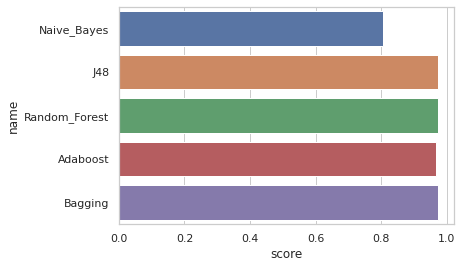

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_no_sampling)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'N': 584, 'Y': 12})
After SMOTE : Counter({'N': 584, 'Y': 584})


In [ ]:
scores_smote = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_smote, y_train_smote)
    
    cross_val_score(estimator=clf,X=X_train_smote,y=y_train_smote,cv=10)
    score = clf.score(X_test, y_test)
    scores_smote.append(score)

In [ ]:
scores_smote

[0.5973154362416108,
 0.8389261744966443,
 0.9664429530201343,
 0.9530201342281879,
 0.7919463087248322]

In [ ]:
result_smote = pd.DataFrame()
result_smote['name'] = names
result_smote['score'] = scores_smote
result_smote

,name,score
0,Naive_Bayes,0.597315
1,J48,0.838926
2,Random_Forest,0.966443
3,Adaboost,0.953020
4,Bagging,0.791946


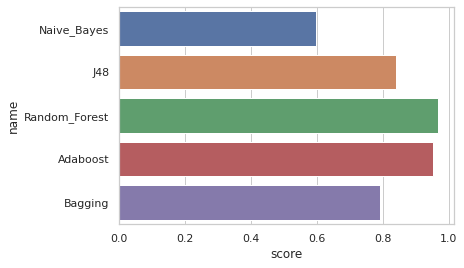

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_smote)

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy='minority',random_state=420,n_neighbors=5)
X_train_ada, y_train_ada = ada.fit_resample(X_train.astype('float'),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print("Before ADASYN :" , Counter(y_train))
print("After ADASYN :" , Counter(y_train_ada))

Before ADASYN : Counter({'N': 584, 'Y': 12})
After ADASYN : Counter({'Y': 588, 'N': 584})


In [ ]:
scores_Adasyn = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_ada, y_train_ada)
    
    cross_val_score(estimator=clf,X=X_train_ada,y=y_train_ada,cv=10)
    score = clf.score(X_test, y_test)
    scores_Adasyn.append(score)

In [ ]:
scores_Adasyn

[0.5973154362416108,
 0.8389261744966443,
 0.9664429530201343,
 0.9463087248322147,
 0.7919463087248322]

In [ ]:
result_Adasyn = pd.DataFrame()
result_Adasyn['name'] = names
result_Adasyn['score'] = scores_Adasyn
result_Adasyn

,name,score
0,Naive_Bayes,0.597315
1,J48,0.838926
2,Random_Forest,0.966443
3,Adaboost,0.946309
4,Bagging,0.791946


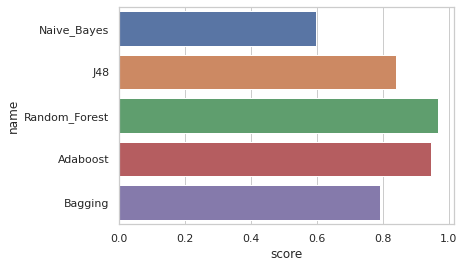

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_Adasyn)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
slsm = BorderlineSMOTE(sampling_strategy='minority',random_state=420)
X_train_slsm, y_train_slsm = slsm.fit_resample(X_train.astype('float'),y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print("Before SLSM :" , Counter(y_train))
print("After SLSM :" , Counter(y_train_slsm))

Before SLSM : Counter({'N': 584, 'Y': 12})
After SLSM : Counter({'N': 584, 'Y': 12})


In [ ]:
scores_slsm = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_slsm, y_train_slsm)
    
    cross_val_score(estimator=clf,X=X_train_slsm,y=y_train_slsm,cv=10)
    score = clf.score(X_test, y_test)
    scores_slsm.append(score)

In [ ]:
scores_slsm

[0.8053691275167785,
 0.9731543624161074,
 0.9731543624161074,
 0.9664429530201343,
 0.9731543624161074]

In [ ]:
result_slsm = pd.DataFrame()
result_slsm['name'] = names
result_slsm['score'] = scores_slsm
result_slsm

,name,score
0,Naive_Bayes,0.805369
1,J48,0.973154
2,Random_Forest,0.973154
3,Adaboost,0.966443
4,Bagging,0.973154


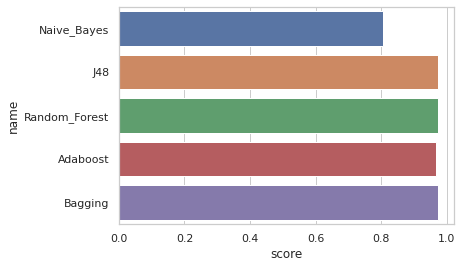

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_slsm)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
rdos = RandomOverSampler(sampling_strategy='minority')
X_train_rdos, y_train_rdos = rdos.fit_resample(X_train.astype('float'),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print("Before rdos :" , Counter(y_train))
print("After rdos :" , Counter(y_train_rdos))

Before rdos : Counter({'N': 584, 'Y': 12})
After rdos : Counter({'N': 584, 'Y': 584})


In [ ]:
from sklearn.model_selection import cross_val_score
scores_rdos = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_rdos, y_train_rdos)
    
    cross_val_score(estimator=clf,X=X_train_rdos,y=y_train_rdos,cv=10)
    score = clf.score(X_test, y_test)
    scores_rdos.append(score)

In [ ]:
scores_rdos

[0.7114093959731543,
 0.7986577181208053,
 0.9731543624161074,
 0.9731543624161074,
 0.7919463087248322]

In [ ]:
result_rdos = pd.DataFrame()
result_rdos['name'] = names
result_rdos['score'] = scores_rdos
result_rdos

,name,score
0,Naive_Bayes,0.711409
1,J48,0.798658
2,Random_Forest,0.973154
3,Adaboost,0.973154
4,Bagging,0.791946


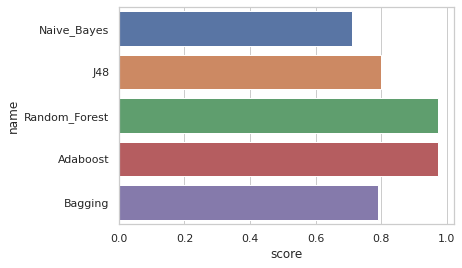

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_rdos)

In [ ]:
  from imblearn.over_sampling import SVMSMOTE
  svm_smote = SVMSMOTE( sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None, m_neighbors=10, svm_estimator=None, out_step=0.5)
X_train_svm_smote, y_train_svm_smote = svm_smote.fit_resample(X_train.astype('float'),y_train)



In [ ]:
from collections import Counter
print("Before svm_smote :" , Counter(y_train))
print("After svm_smote :" , Counter(y_train_svm_smote))

Before svm_smote : Counter({'N': 67, 'Y': 33})
After svm_smote : Counter({'N': 67, 'Y': 67})


In [ ]:
from sklearn.model_selection import cross_val_score
scores_svm_smote = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_svm_smote, y_train_svm_smote)
    
    cross_val_score(estimator=clf,X=X_train_svm_smote,y=y_train_svm_smote,cv=10)
    score = clf.score(X_test, y_test)
    scores_svm_smote.append(score)

In [ ]:
scores_svm_smote

[0.68, 0.68, 0.68, 0.64, 0.56]

In [ ]:
result_svm_smote = pd.DataFrame()
result_svm_smote['name'] = names
result_svm_smote['score'] = scores_svm_smote
result_svm_smote

,name,score
0,Naive_Bayes,0.68
1,J48,0.68
2,Random_Forest,0.68
3,Adaboost,0.64
4,Bagging,0.56


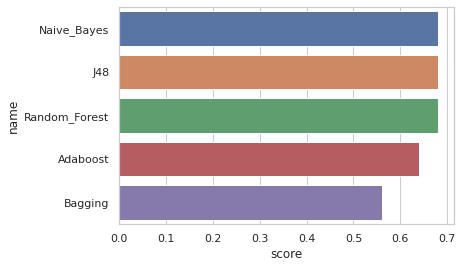

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_svm_smote)